In [12]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_selector as selector
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import models
from zipfile import ZipFile
from sklearn.datasets import load_breast_cancer
from scipy.stats import chi2_contingency
from datetime import datetime
from xgboost import XGBClassifier
import scipy

#from feature_engine import OrdinalEncoder

SyntaxError: invalid syntax (<ipython-input-12-3028795f7208>, line 22)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
with ZipFile('/content/drive/My Drive/Titanic/titanic.zip','r') as f:
  f.extractall()

In [43]:
train=pd.read_csv("train.csv")


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
y =train.Survived

In [45]:
train.drop(["PassengerId","Survived","Name"],axis=1,inplace=True )

In [46]:
cat_columns = ["Pclass","Sex","SibSp","Parch","Embarked"]
num_columns = ["Age","Fare","Parch","SibSp"]

In [55]:
train_x,test_x,train_y,test_y= train_test_split(train,y)

In [51]:
Sex_dict= dict([(b,a) for a,b in enumerate(train.Sex.unique())])
Ticket_dict= dict([(b,a) for a,b in enumerate(train.Ticket.unique())])
Embarked_dict= dict([(b,a) for a,b in enumerate(train.Embarked.unique())])
Cabin_dict= dict([(b,a) for a,b in enumerate(train.Cabin.unique())])

In [56]:
train_x.Sex=train_x.Sex.map(lambda x: Sex_dict.get(x,-1))
train_x.Embarked=train_x.Embarked.map(lambda x: Embarked_dict.get(x,-1))
train_x.Cabin=train_x.Cabin.map(lambda x: Cabin_dict.get(x,-1))
train_x.Ticket=train_x.Ticket.map(lambda x: Ticket_dict.get(x,-1))

In [57]:
test_x.Sex=test_x.Sex.map(lambda x: Sex_dict.get(x,-1))
test_x.Embarked=test_x.Embarked.map(lambda x: Embarked_dict.get(x,-1))
test_x.Cabin=test_x.Cabin.map(lambda x: Cabin_dict.get(x,-1))
test_x.Ticket=test_x.Ticket.map(lambda x: Ticket_dict.get(x,-1))

In [40]:
model= XGBClassifier()

In [58]:
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
model.predict(test_x)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0])

In [60]:
confusion_matrix=pd.crosstab(test_y,model.predict(test_x))

In [61]:
confusion_matrix

col_0,0,1
Survived,,
0,120,17
1,22,64


In [66]:
f1_score(test_y,model.predict(test_x))

0.7664670658682635

In [70]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score,roc_curve,recall_score,precision_score

In [73]:
roc_auc_score(test_y,model.predict(test_x))

TypeError: cannot unpack non-iterable numpy.float64 object

In [75]:
fpr,tpr,threshold=roc_curve(test_y,model.predict(test_x))

In [ ]:
help(roc_curve)

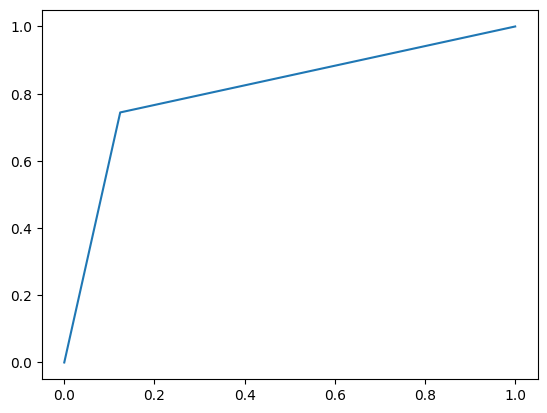

In [76]:
plt.plot(fpr,tpr)